In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import cv2

import sys
import os

In [3]:
sys.path.append('../src')

In [4]:
import image_utils
from image_classes import ImageObject
from pdf_classes import PdfObject

In [5]:
relative_file_path = '../data/color/image_docs/ex4.jpg'
file_path = os.path.abspath(relative_file_path)
img = ImageObject(file_path=file_path)

In [6]:
img.find_stamps()

In [7]:
len(img.circles)

2

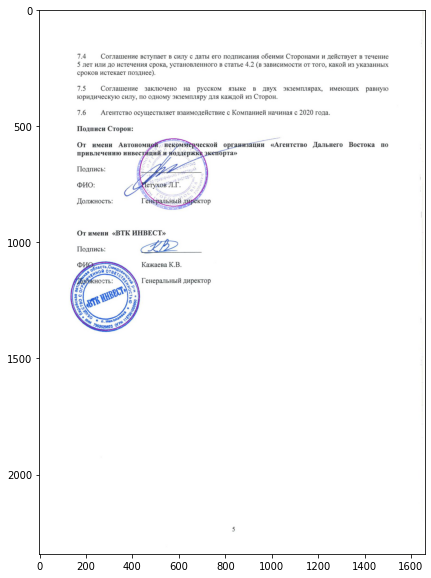

In [8]:
img.show_stamp_image()

In [9]:
new_img = image_utils.image_draw_circles(img.matrix, img.circles)

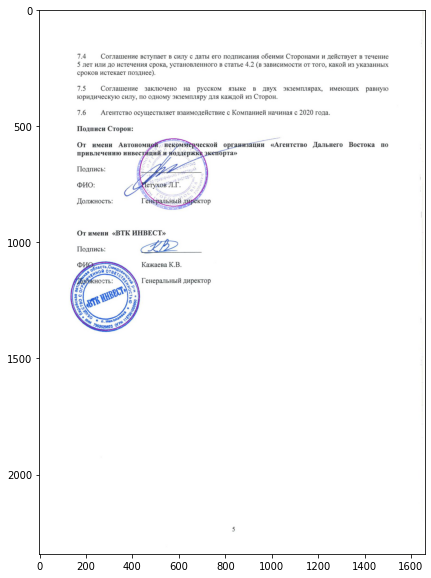

In [13]:
image_utils.image_imshow(new_img)

In [21]:
img.circles

array([[ 285, 1240,  146],
       [ 568,  704,  152]], dtype=uint16)

In [13]:
img.is_fitted_stamp

True

In [14]:
img.boxes

array([[[ 139, 1094],
        [ 431, 1386]],

       [[ 416,  552],
        [ 720,  856]]])

In [22]:
img.file_path

'/Users/belyakov/Desktop/StampRecognition/StampDetection/data/color/image_docs/ex4.jpg'

In [23]:
img.stamp_flg

True

In [24]:
zero_img = np.zeros((450,450,3), dtype='uint8')

In [25]:
img1 = ImageObject(matrix=zero_img)

In [26]:
img1.find_stamps()

In [27]:
img1.is_fitted_stamp

True

In [28]:
img1.boxes

array([], dtype=float64)

In [29]:
img1.circles

array([], dtype=float64)

In [30]:
image_utils.squares_from_circles(np.array([]))

array([], dtype=float64)

In [14]:
relative_file_path = '../data/color/pdf_docs/2017-12-18_Мерси Трейд.pdf'
file_path = os.path.abspath(relative_file_path)
pdf = PdfObject(file_path)

In [15]:
pdf.get_images()
pdf.find_stamps()

In [16]:
pdf.n_stamps

1

In [17]:
import cv2

In [147]:
min_rad = round(matr.shape[0] * 15 / 297)
max_rad = round(matr.shape[0] * 30 / 297)
dist_stamps = 2*min_rad
circles = cv2.HoughCircles(matr, cv2.HOUGH_GRADIENT, 1, dist_stamps, param1=20,
                               param2=30,minRadius=min_rad, maxRadius=max_rad)
circles = np.uint16(np.around(circles))
circles = circles[0,:]

In [148]:
circles

array([[1018, 1450,  136],
       [ 264, 1734,  148]], dtype=uint16)

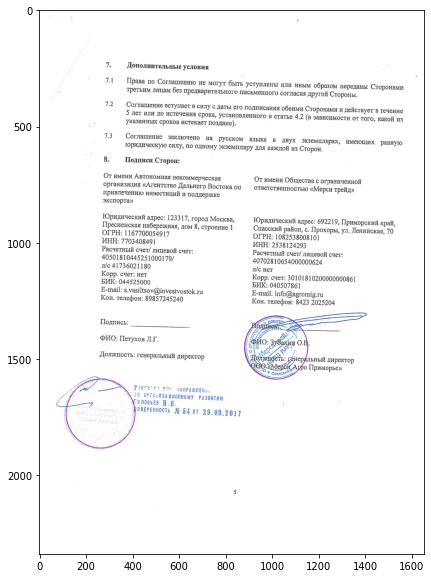

In [149]:
image_utils.image_imshow(image_utils.image_draw_circles(img.matrix, circles))

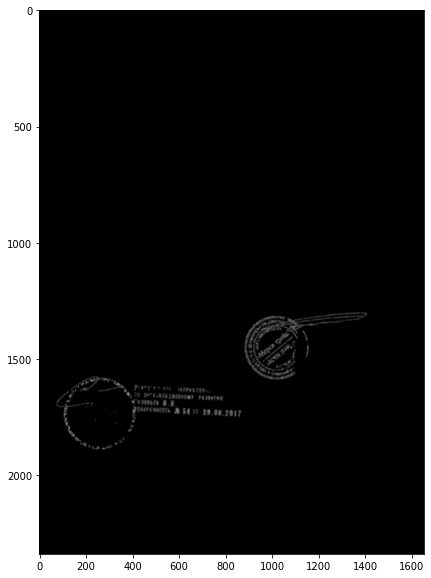

In [20]:
matr = image_utils._blue_color_mask(img.matrix)
image_utils.image_imshow(matr)

Number of stamps: 0


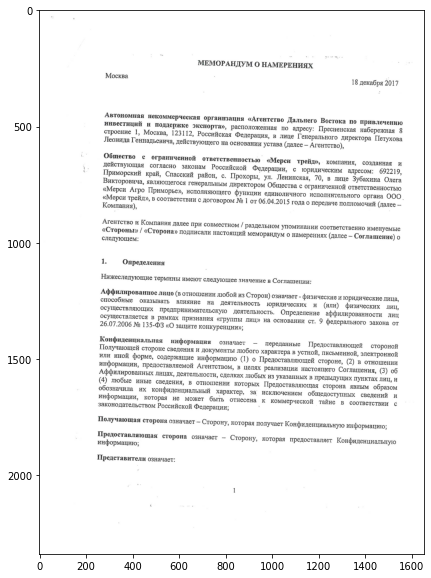

Number of stamps: 0


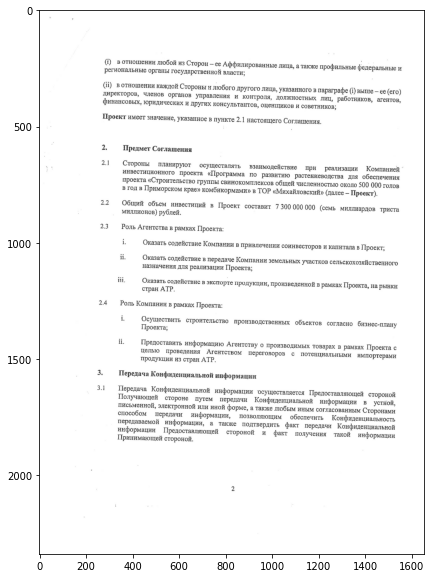

Number of stamps: 0


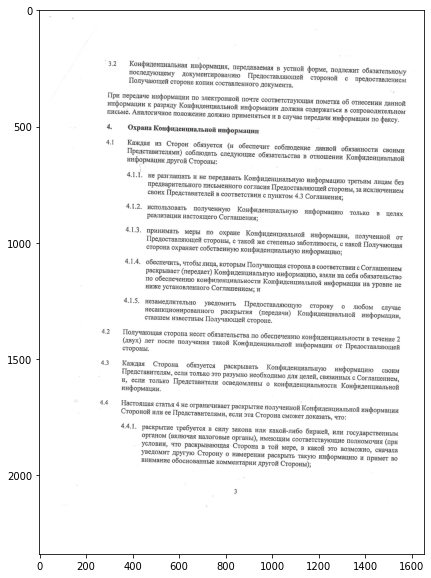

Number of stamps: 0


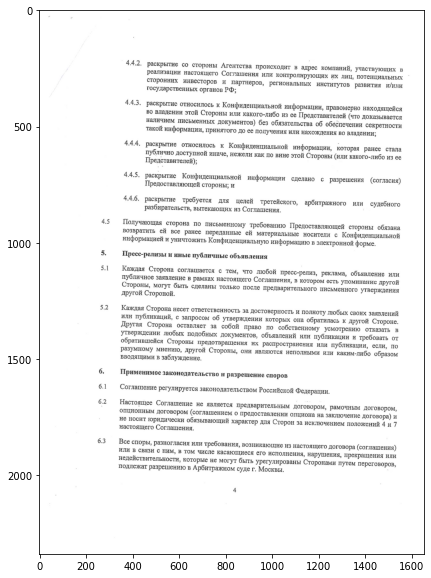

Number of stamps: 1


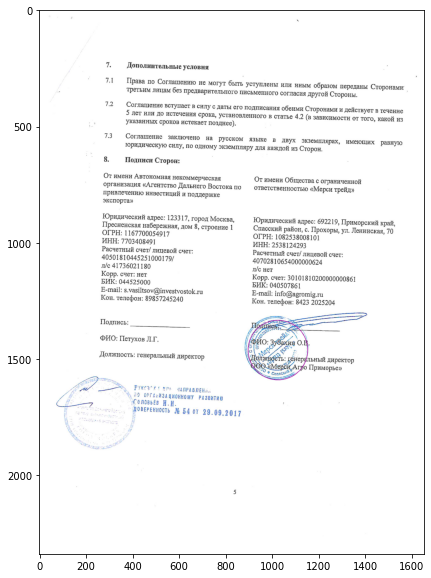

In [19]:
for img in pdf.images.values():
    print(f'Number of stamps: {len(img.circles)}')
    img.show_stamp_image()

In [36]:
from tqdm import tqdm

In [42]:
for pdf_path in pathlist:
    print(pdf_path)

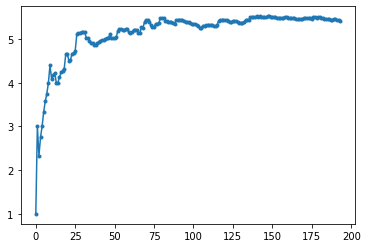

CPU times: user 2min 12s, sys: 37.7 s, total: 2min 50s
Wall time: 3min 39s


In [28]:
%%time
from pathlib import Path
from IPython.display import clear_output
relative_dir_path = '../data/color/pdf_docs'
abs_dir_path = os.path.abspath(relative_dir_path)
pathlist = Path(abs_dir_path).rglob('*.pdf')

pages = []
mean_pages = []
for cnt, pdf_path in enumerate(pathlist):
    pdf = PdfObject(str(pdf_path))
    pdf.get_images()
    pdf.find_stamps()
    
    n_pages = len(pdf.images)
    pages.append(n_pages)
    mean_pages.append(np.mean(pages))
    clear_output(True) # чтобы всё на одной картинке рисовалось, а не на милионе
    plt.plot(mean_pages, marker='.')
    plt.show()

In [30]:
mean_pages[-1]

5.422680412371134

In [19]:
sum(1 for x in pathlist)

194

Number of stamps: 0


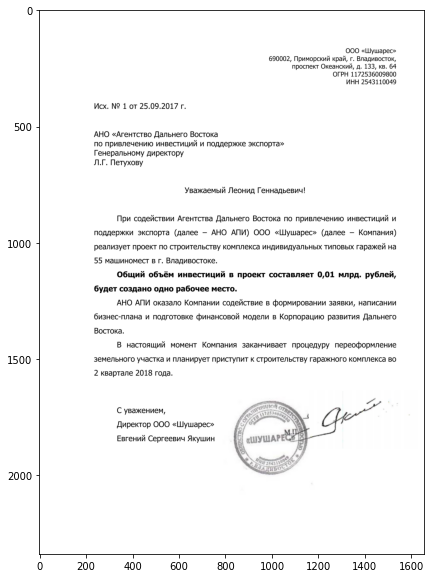

None
-----------------
Number of stamps: 0


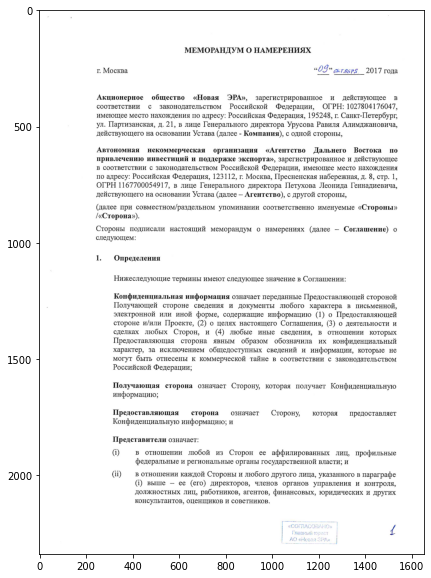

None
Number of stamps: 0


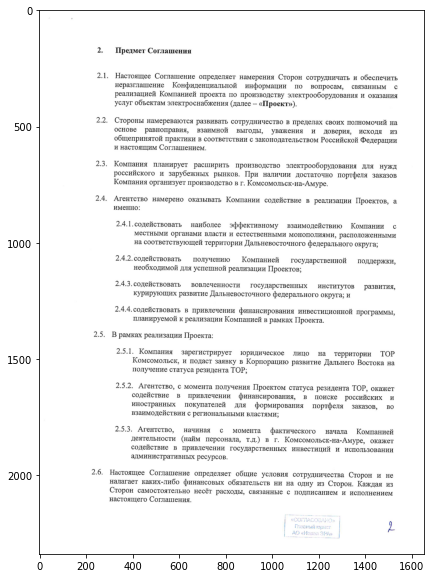

None
Number of stamps: 0


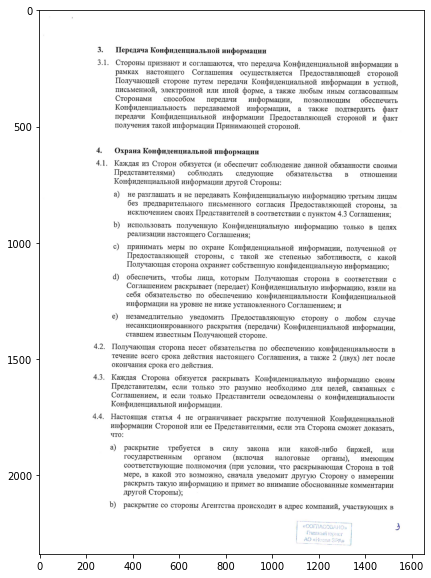

None
Number of stamps: 0


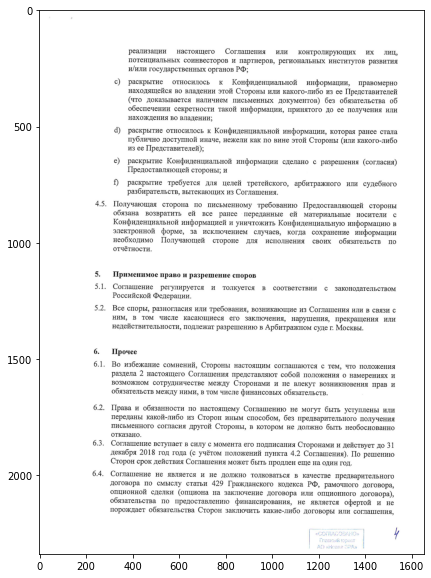

None
Number of stamps: 2


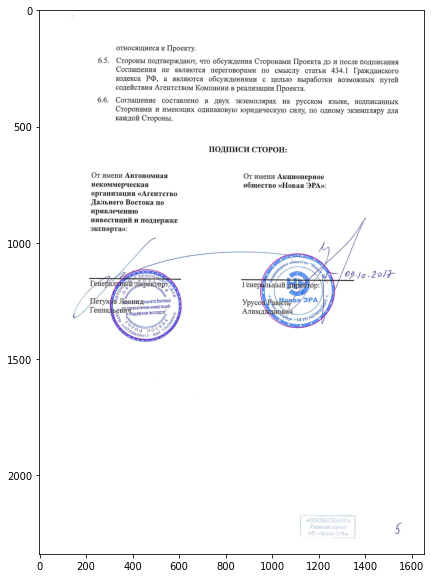

None
-----------------
Number of stamps: 1


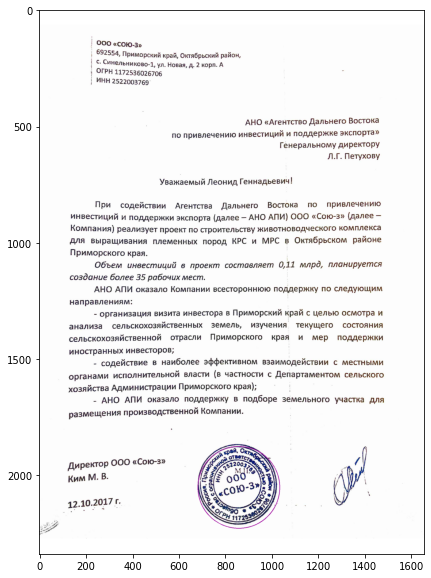

None
-----------------
Number of stamps: 0


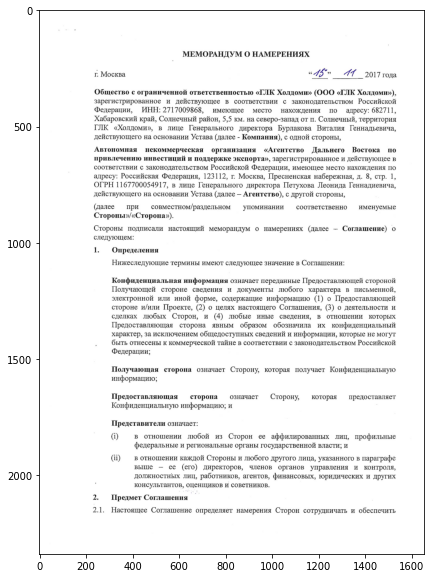

None
Number of stamps: 0


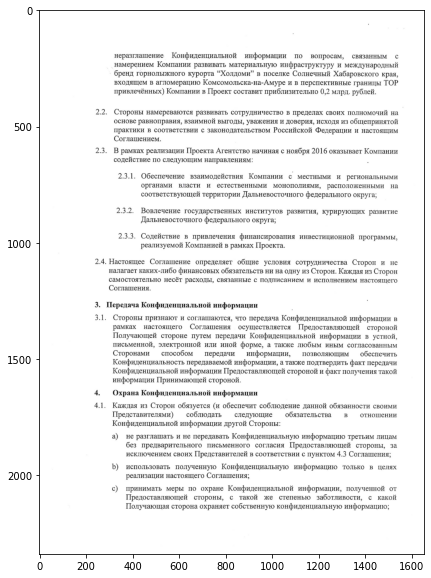

None
Number of stamps: 0


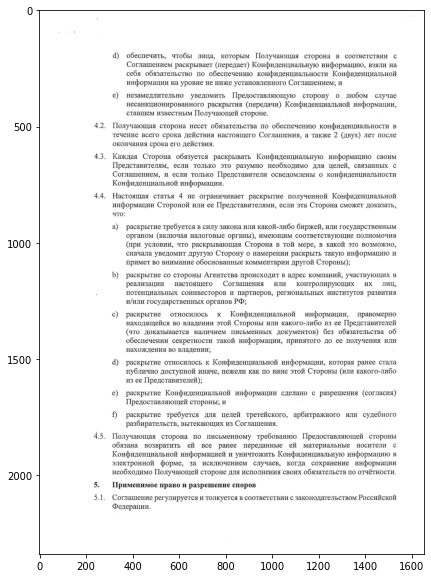

None
Number of stamps: 2


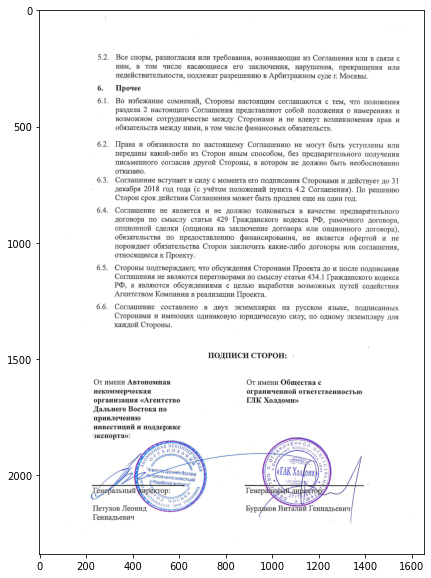

None
-----------------
Number of stamps: 0


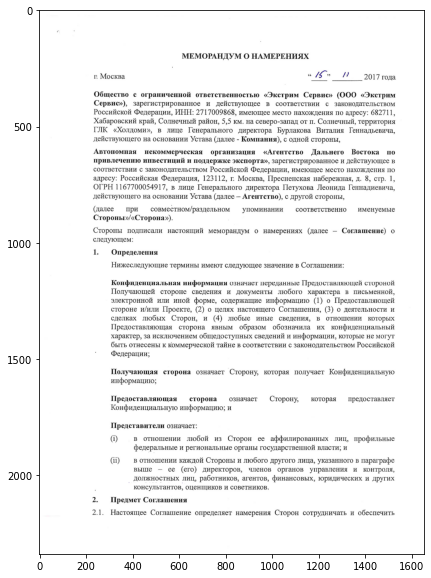

None
Number of stamps: 0


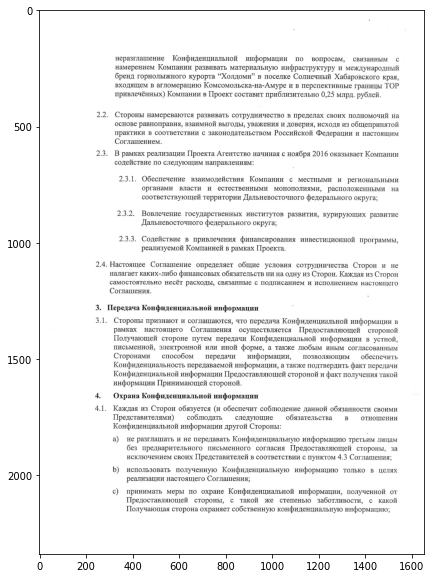

None
Number of stamps: 0


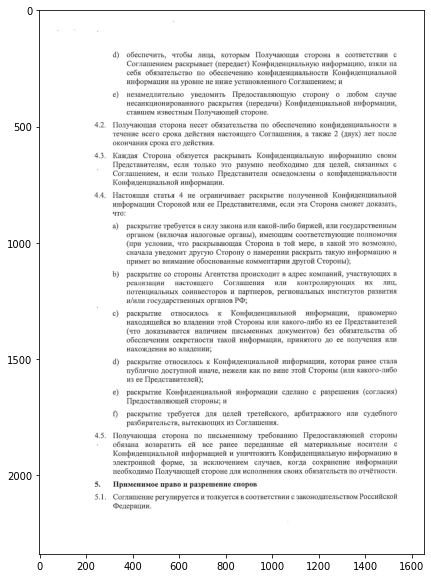

None
Number of stamps: 2


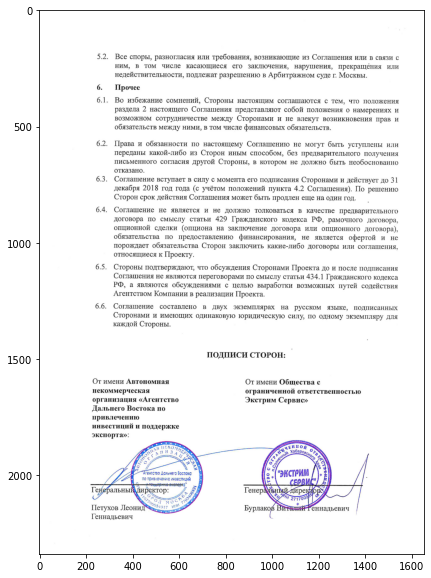

None
-----------------
Number of stamps: 0


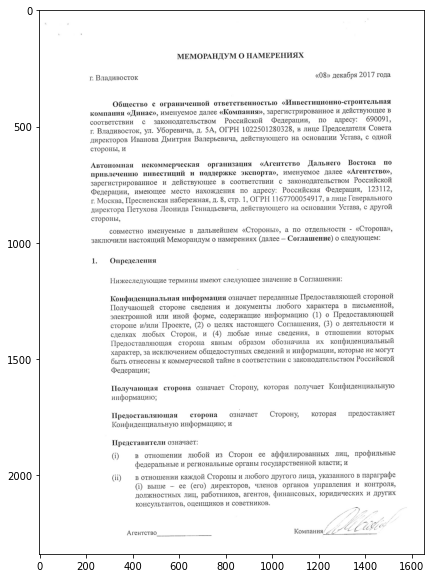

None
Number of stamps: 0


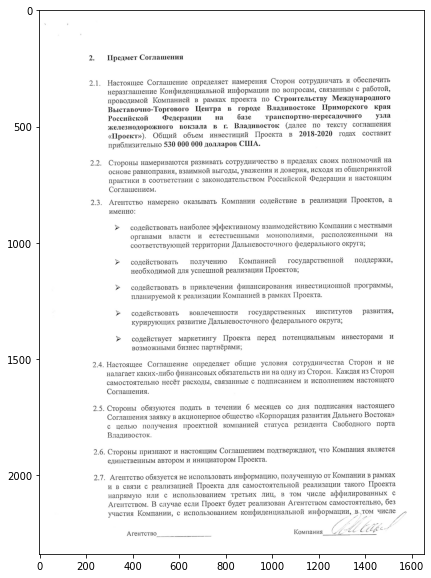

None
Number of stamps: 0


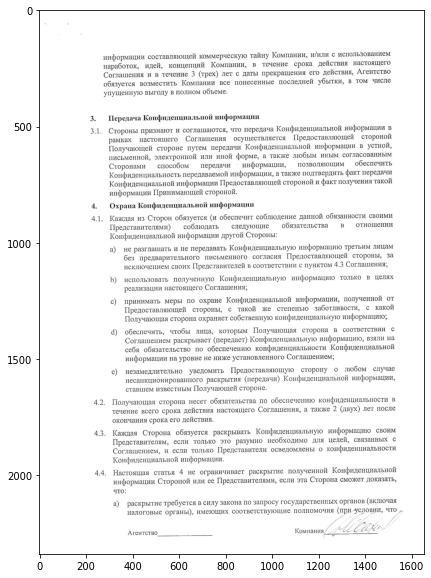

None
Number of stamps: 0


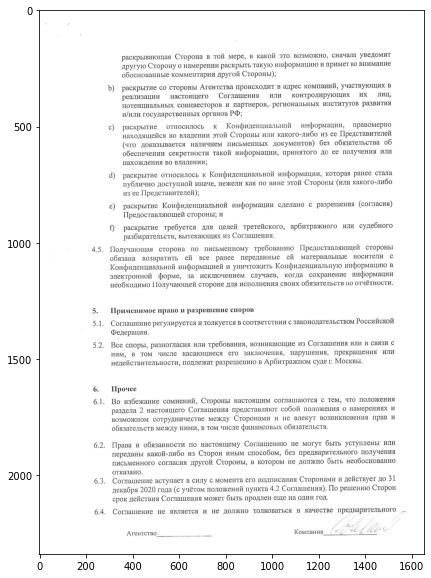

None
Number of stamps: 2


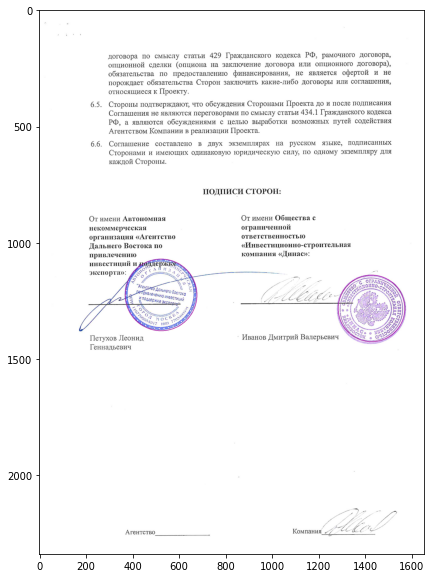

None
-----------------
Number of stamps: 0


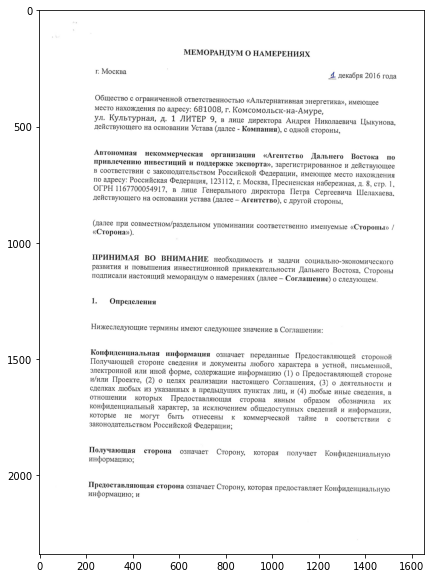

None
Number of stamps: 0


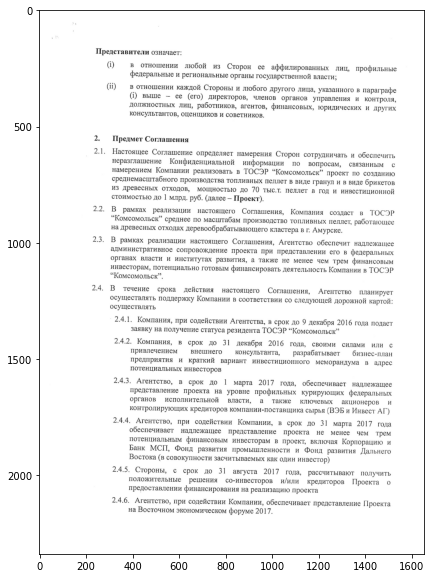

None
Number of stamps: 0


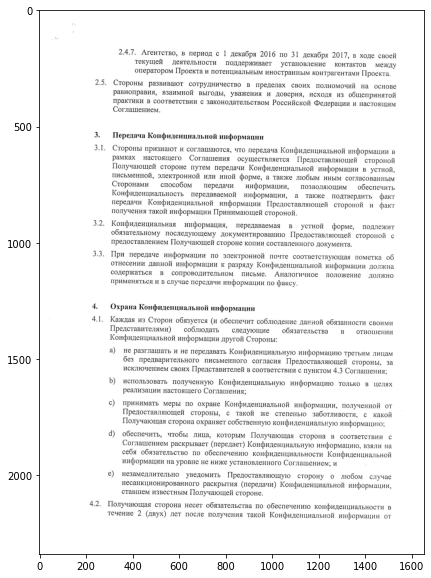

None
Number of stamps: 0


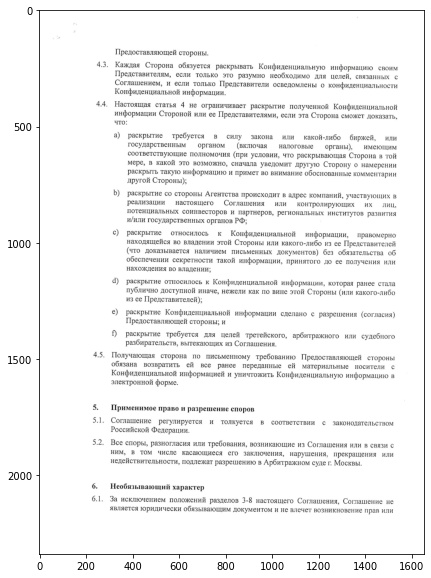

None
Number of stamps: 2


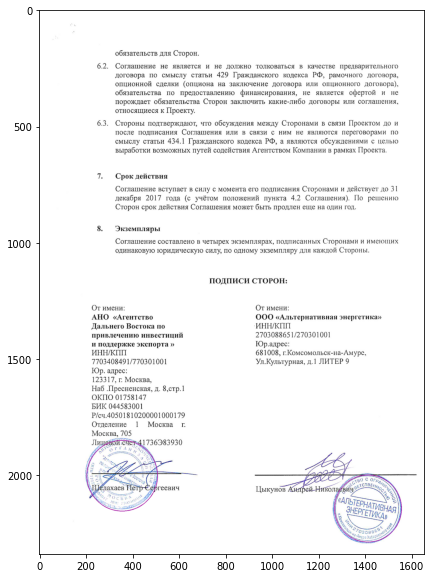

None
-----------------
CPU times: user 17.1 s, sys: 2.34 s, total: 19.5 s
Wall time: 12.6 s


In [6]:
%%time
from pathlib import Path
relative_dir_path = '../data/color/pdf_docs'
abs_dir_path = os.path.abspath(relative_dir_path)
pathlist = Path(abs_dir_path).rglob('*.pdf')
for cnt, pdf_path in enumerate(pathlist):
    pdf = PdfObject(str(pdf_path))
    pdf.get_images()
    pdf.find_stamps()
    for img in pdf.images.values():
        print(f'Number of stamps: {len(img.circles)}')
        print(img.show_stamp_image())
    print('-----------------')
    if cnt > 5:
        break